# Iterative Lösung der Laplace-Gleichung

Wir lösen
$$ \Delta u = 0 $$
auf dem Einheitsquadrat. Wir konstruieren eine analytische Lösung als Realteil einer holomorphen Funktion:
$$ u(x,y) = \text{Re} f(z) = \text{Re}(\frac{1}{z-2i} - \frac{1}{z+2i}) = \frac{x}{x^2 + (2-y)^2} - \frac{x}{x^2 + (2+y)^2}$$
und lösen das entsprechende Randwertproblem auf einem Gitter mit dem Finite-Differenzen-Verfahren.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [2]:
def u_exact(x, y):
    return x/(x**2 + (y-2)**2) - x/(x**2 + (y+2)**2)

In [19]:
N = 200
u = np.zeros((N,N))
xs = np.linspace(0,1,N)
ys = np.linspace(0,1,N)
u[:,-1] = u_exact(1,xs)
u[-1,:] = u_exact(ys,1)
u_0 = 1.0*u

CPU times: user 9.62 s, sys: 102 ms, total: 9.72 s
Wall time: 9.82 s


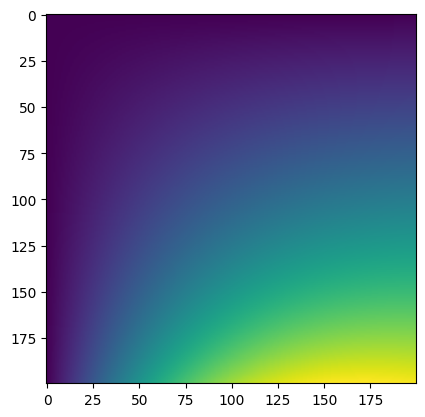

In [37]:
%%time
N_IT = 100_000

#@njit
def laplace_iteration(u, n_it):
    for _ in range(n_it):
        u[1:-1,1:-1] = (u[0:-2,1:-1] + u[2:,1:-1] + u[1:-1,0:-2] + u[1:-1,2:])/4
    return u

@njit
def laplace_iteration2(u, n_it):
    for _ in range(n_it):
        for j in range(1,N-1):
            for k in range(1,N-1):
                u[j,k] = (u[j-1,k] + u[j+1,k] + u[j,k-1] + u[j,k+1])/4
    return u

u = u_0.copy()
u = laplace_iteration2(u, N_IT)

plt.imshow(u);

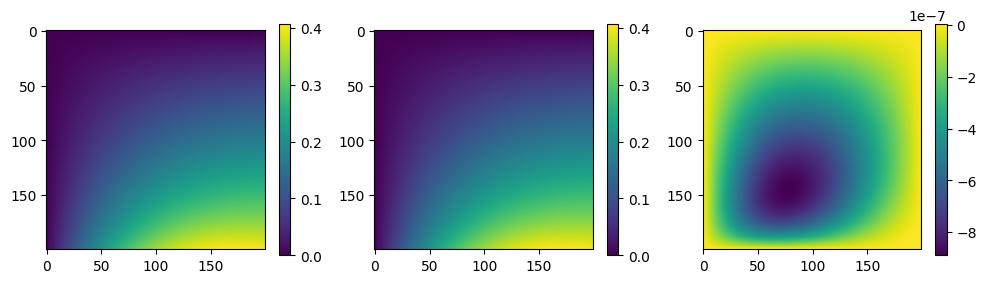

In [38]:
X, Y = np.meshgrid(xs,ys)
u_real = u_exact(X, Y)
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5))
im0 = ax0.imshow(u_real);
s = 0.6
plt.colorbar(im0, ax=ax0, shrink=s)
im1 = ax1.imshow(u); 
plt.colorbar(im1, ax=ax1, shrink=s)
im2 = ax2.imshow(u_real - u);
plt.colorbar(im2, ax=ax2, shrink=s)